### Predict the number of hits Mazvidal lands based on the seconds into the round, elapsed since last action, 
cumulative number of hits received/landed/missed and number of hits received total for that round
This data is split into a training set of 70% and a testing set of 30%
based only on those instances action other than circling/standing/stepping away/toward/to the side occurs
There are 92 instances of 64 training set samples of each second of action, 
and the remaining 28 are testing samples of each second of action
            

### Sci-kit learns (sklearn)  in prediction, Ensemble and Logistic scored best at 83% prediction accuracy
Other sklearn accuracy measures for modular ML algorithms were:
    KNN with 60.7 % accuracy
    Random Forest with 39.3 % accuracy on the testing set with 50 trees
    ensemble (on logistic [83%], naive bayes [71%], and random forests [80%]) with 83 % accuracy
    Decision Tree with max depth of 3 scored 57% accuracy
    decision tree with 2 as max depth was 54 % accuracy
    decision tree with 5 as max depth was 50 % accuracy
    decision tree with 10 as max depth was 54 % accuracy
Note: error with the keras perceptron (logistic regression:sigmoid/relu) and multilayer perceptrons (NNs)

In [1]:
%%time

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

# Read in the file for the dataset used in the final project due Week 8
df = pd.read_csv('MazvidalTillUFC.csv', index_col=0)



Wall time: 41.1 s


In [2]:
df.head() #lists Type as the string factor names

SecondsIntoRound  SecondsLastRoundAction  cmTotHitsR-M  cmTotHitsL-M  \
Round                                                                         
1                     1                       1             0             0   
1                     4                       4             0             0   
1                    12                       8             1             0   
1                    13                       1             1             0   
1                    20                       8             1             0   

       cmTotHitsM-M  Hits-Recvd-M  Hits-Lnd-M  Hits-Mssd-M  cmTotHitsR-T  \
Round                                                                      
1                 0             0           0            0             0   
1                 0             0           0            0             0   
1                 0             1           0            0             0   
1                 0             0           0            0             0   
1                 0             0           0            0             0   

       cmTotHitsL-T  cmTotHitsM-T  Hits-Recvd-T  Hits-Lnd-T  Hits-Mssd-T  \
Round                                                                      
1                 0             0             0           0            0   
1                 0             0             0           0            0   
1                 1             0             0           1            0   
1                 1             0             0           0            0   
1                 1             0             0           0            0   

       Time    MasvidalFighterActionReactions  \
Round                                           
1      5:00  runs in for low kick immediately   
1      4:57          lands illegal groin kick   
1      4:49                receives head shot   
1      4:48                   drops to ground   
1      4:41               still on the ground   

                    TillFightersActionsReactions  \
Round                                              
1                                              0   
1      referee pauses fight 30 seconds to regain   
1                         lands left hit to head   
1                                              0   
1                            overpowering on top   

                                                   notes  
Round                                                     
1      liverpool, England and Till (south paw) is the...  
1                                                    NaN  
1                                                    NaN  
1                                                    NaN  
1                                                    NaN

In [3]:
df.describe()

SecondsIntoRound  SecondsLastRoundAction  cmTotHitsR-M  cmTotHitsL-M  \
count         92.000000               92.000000     92.000000     92.000000   
mean         121.793478                5.652174      3.891304      6.228261   
std           79.356414                4.920097      2.018903      4.294395   
min            1.000000                0.000000      0.000000      0.000000   
25%           49.750000                2.000000      2.000000      2.750000   
50%          121.000000                4.000000      4.000000      6.000000   
75%          174.500000                8.000000      5.000000     10.000000   
max          298.000000               28.000000      8.000000     14.000000   

       cmTotHitsM-M  Hits-Recvd-M  Hits-Lnd-M  Hits-Mssd-M  cmTotHitsR-T  \
count     92.000000     92.000000   92.000000    92.000000     92.000000   
mean       9.282609      0.152174    0.260870     0.413043      6.228261   
std        6.758513      0.361158    0.488765     0.595813      4.294395   
min        0.000000      0.000000    0.000000     0.000000      0.000000   
25%        4.000000      0.000000    0.000000     0.000000      2.750000   
50%        8.500000      0.000000    0.000000     0.000000      6.000000   
75%       14.000000      0.000000    0.000000     1.000000     10.000000   
max       23.000000      1.000000    2.000000     2.000000     14.000000   

       cmTotHitsL-T  cmTotHitsM-T  Hits-Recvd-T  Hits-Lnd-T  Hits-Mssd-T  
count     92.000000     92.000000     92.000000   92.000000    92.000000  
mean       3.891304      2.760870      0.260870    0.152174     0.195652  
std        2.018903      3.378567      0.488765    0.361158     0.450619  
min        0.000000      0.000000      0.000000    0.000000     0.000000  
25%        2.000000      0.000000      0.000000    0.000000     0.000000  
50%        4.000000      1.000000      0.000000    0.000000     0.000000  
75%        5.000000      5.000000      0.000000    0.000000     0.000000  
max        8.000000     11.000000      2.000000    1.000000     2.000000

### Lets make the target variable the 'Hits-lnd-A'-6 based on the first 6 fields: 


## Split the data into 70% Training and 30% Testing Samples

In [4]:
X = df.iloc[:,0:5].values # returns array of all instances of the Type field
y = df.iloc[:, 6] .values # returns array of all instances of 
#y = np.where(y=='uterine healthy tissue',0,1) # gives all entries 0 if equal to 'uterine ...' and 1 otherwise
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64L, 5L)
(28L, 5L)
(64L,)
(28L,)


### There are 64 training samples and 28 testing samples with above split of 70-30

In [5]:
stdscaler = preprocessing.StandardScaler().fit(X_train)
X_scaled  = stdscaler.transform(X)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

C:\Users\m\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
print "Training set samples: ", len(X_train)
print "Testing set samples: ", len(X_test)

Training set samples:  64
Testing set samples:  28


In [7]:
X_train_std = X_train_scaled
X_test_std = X_test_scaled

### KNN

In [8]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
% time
knn = KNeighborsClassifier()
knn.fit(X_train,
        y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
% time
y_pred = knn.predict(X_test)#_std)

Wall time: 0 ns


In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print cm
print 'Accuracy: ',accuracy_score(y_test, y_pred)


[[17  0]
 [11  0]]
Accuracy:  0.6071428571428571


### Decision Trees


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, tree
from sklearn.metrics import classification_report, confusion_matrix



In [12]:
% time
dtc = tree.DecisionTreeClassifier(criterion='entropy')#, max_depth=3)
dtc.fit(X_train, y_train)
predicted = dtc.predict(X_test)

print "Decision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,predicted)
print "\n Classifcation Report"
print classification_report(y_test,predicted)

Wall time: 0 ns
Decision Tree Results
Confusion Matrix: 
[[14  2  1]
 [ 9  2  0]
 [ 0  0  0]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.61      0.82      0.70        17
           1       0.50      0.18      0.27        11
           2       0.00      0.00      0.00         0

   micro avg       0.57      0.57      0.57        28
   macro avg       0.37      0.34      0.32        28
weighted avg       0.57      0.57      0.53        28



C:\Users\m\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Decision Tree Regression

In [13]:
#Week 7 ipynb

%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



In [14]:
import random #keep the same results when running the code, as results vary with each run of code
random.seed(100)

In [15]:
# Fit regression model
% time
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_3 = tree.DecisionTreeRegressor(max_depth=10)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)

# Predict
#X_test = np.arange(0.0, 300, 0.1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
% time

Wall time: 0 ns
Wall time: 0 ns


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, tree
from sklearn.metrics import classification_report, confusion_matrix



In [17]:
print "Decision Tree Regression Prediction with Max Depth=2" 
print y_1.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results Max Depth=2\nConfusion Matrix: "
print confusion_matrix(y_test,y_1.round())
print "\n Classifcation Report"
print classification_report(y_test,y_1.round())

a=sum(y_1.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_1.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=2"
print round(float(a)/float(b),2),"%"


Decision Tree Regression Prediction with Max Depth=2
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1.]

Actual Testing Subset Categorical Values:
[0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0]

Decision Tree Results Max Depth=2
Confusion Matrix: 
[[13  4]
 [10  1]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.57      0.76      0.65        17
           1       0.20      0.09      0.13        11

   micro avg       0.50      0.50      0.50        28
   macro avg       0.38      0.43      0.39        28
weighted avg       0.42      0.50      0.44        28

The number of testing samples:
28
The number of correct predictions:
14
[ True False  True  True False  True False False False False  True  True
  True  True  True False  True False False  True  True False False False
  True False  True False]

Accuracy of Decision Tree with Max Depth=2
0.5 %


In [18]:
print "Decision Tree Regression Prediction with Max Depth=5" 
print y_2.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,y_2.round())
print "\n Classifcation Report"
print classification_report(y_test,y_2.round())

Decision Tree Regression Prediction with Max Depth=5
[0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.
 0. 0. 0. 0.]

Actual Testing Subset Categorical Values:
[0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0]

Decision Tree Results
Confusion Matrix: 
[[15  0  2]
 [10  0  1]
 [ 0  0  0]]

 Classifcation Report
              precision    recall  f1-score   support

         0.0       0.60      0.88      0.71        17
         1.0       0.00      0.00      0.00        11
         2.0       0.00      0.00      0.00         0

   micro avg       0.54      0.54      0.54        28
   macro avg       0.20      0.29      0.24        28
weighted avg       0.36      0.54      0.43        28



C:\Users\m\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
a=sum(y_2.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_2.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=5"
print round(float(a)/float(b),2),"%"

The number of testing samples:
28
The number of correct predictions:
15
[ True False  True  True False  True False False False False  True  True
 False  True  True False  True False False  True  True  True False False
  True False  True  True]

Accuracy of Decision Tree with Max Depth=5
0.54 %


### Decision Tree with Max Depth = 5 and Max Depth = 10 produced similar results

In [20]:
print "Decision Tree Regression Prediction with Max Depth=10" 
print y_3.round()
print "\nActual Testing Subset Categorical Values:"
print y_test

print "\nDecision Tree Results\nConfusion Matrix: "
print confusion_matrix(y_test,y_3.round())
print "\n Classifcation Report"
print classification_report(y_test,y_3.round())

a=sum(y_3.round()==y_test)
b= len(y_test)
print 'The number of testing samples:'
print b
print 'The number of correct predictions:'
print a

print y_3.round() == y_test
print "\nAccuracy of Decision Tree with Max Depth=10"
print round(float(a)/float(b),2),"%"

Decision Tree Regression Prediction with Max Depth=10
[1. 1. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0.]

Actual Testing Subset Categorical Values:
[0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0]

Decision Tree Results
Confusion Matrix: 
[[12  4  1]
 [ 8  3  0]
 [ 0  0  0]]

 Classifcation Report
              precision    recall  f1-score   support

         0.0       0.60      0.71      0.65        17
         1.0       0.43      0.27      0.33        11
         2.0       0.00      0.00      0.00         0

   micro avg       0.54      0.54      0.54        28
   macro avg       0.34      0.33      0.33        28
weighted avg       0.53      0.54      0.52        28

The number of testing samples:
28
The number of correct predictions:
15
[False  True  True  True False  True  True False False False  True  True
  True  True  True False  True False False False  True False False False
  True False  True  True]

Accuracy of Decision Tree with

### Ensemble Trees, Voting Classifier
logistic, random forest, and gaussian naive bayes used

In [21]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train_std, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:651: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\m\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\m\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\m\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.83 (+/- 0.05) [Logistic Regression]
Accuracy: 0.80 (+/- 0.07) [Random Forest]
Accuracy: 0.71 (+/- 0.06) [naive Bayes]
Accuracy: 0.83 (+/- 0.05) [Ensemble]


### PCA then K-means UnSupervised classification

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import manifold

np.random.seed = 47

In [23]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_
print X_train_pca.shape

(64L, 5L)


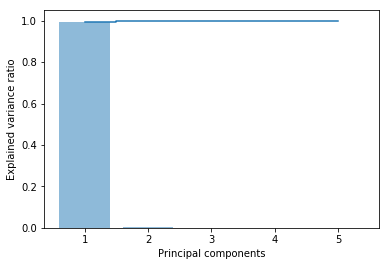

In [24]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [25]:
n_neighbors = 10
n_components = 2

Wall time: 31 ms


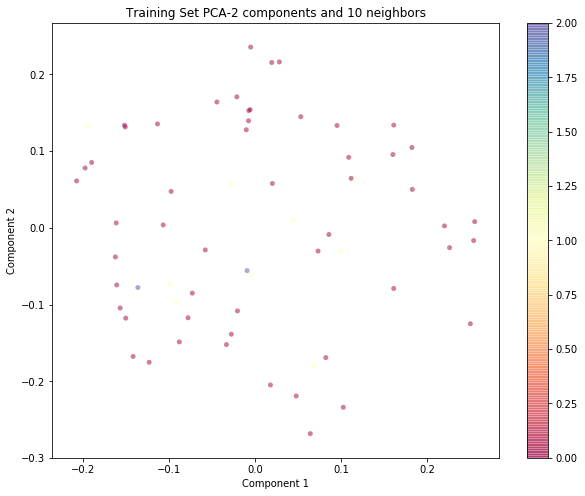

In [26]:
% time Y2 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,\
                                    eigen_solver='auto',\
                                    method='standard').fit_transform(X_train_std)
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('Training Set PCA-2 components and 10 neighbors')
plt.scatter(Y2[:, 0], Y2[:, 1], c=y_train, cmap=plt.cm.Spectral,edgecolors='none',s=25,alpha=0.5);
cbar=plt.colorbar()
#cbar.set_ticks(list(class_mapping.values()))
#cbar.set_ticklabels(list(class_mapping.keys()))

In [27]:
pca = PCA()
X_test_pca = pca.fit_transform(X_test_std)
pca.explained_variance_ratio_
print X_test_pca.shape

(28L, 5L)


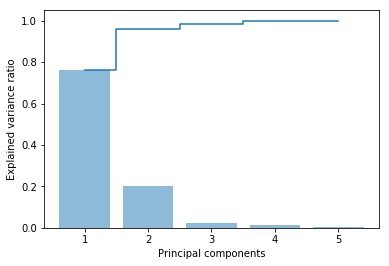

In [28]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [29]:
n_neighbors = 10
n_components = 2

Wall time: 188 ms


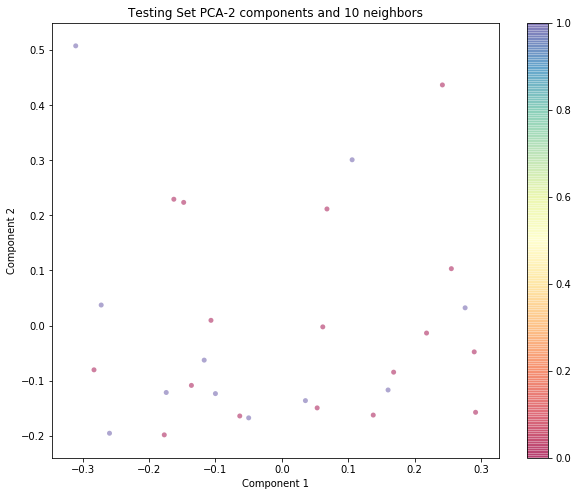

In [30]:
% time Y2 = manifold.LocallyLinearEmbedding(n_neighbors, n_components,\
                                    eigen_solver='auto',\
                                    method='standard').fit_transform(X_test_std)
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('Testing Set PCA-2 components and 10 neighbors')
plt.scatter(Y2[:, 0], Y2[:, 1], c=y_test, cmap=plt.cm.Spectral,edgecolors='none',s=25,alpha=0.5);
cbar=plt.colorbar()
#cbar.set_ticks(list(class_mapping.values()))
#cbar.set_ticklabels(list(class_mapping.keys()))

### K-means

In [31]:
from sklearn.cluster import KMeans
Y = KMeans(n_clusters=2).fit_transform(X_train_std)

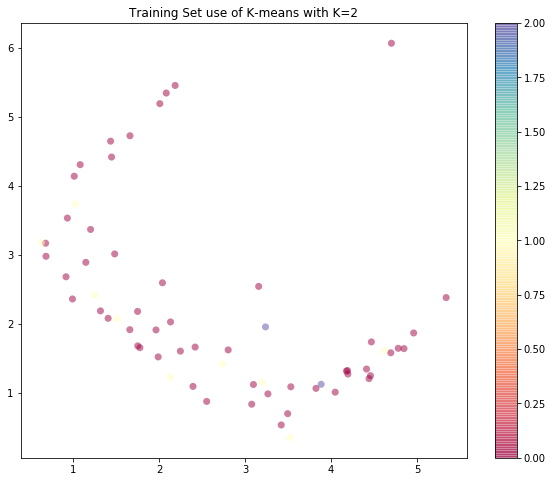

In [32]:
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.scatter(Y[:, 0], Y[:, 1], c=y_train, cmap=plt.cm.Spectral,edgecolors='none',s=50,alpha=0.5);
plt.title('Training Set use of K-means with K=2')
cbar=plt.colorbar()
#cbar.set_ticks(list(class_mapping.values()))
#cbar.set_ticklabels(list(class_mapping.keys()))

In [33]:
Y1 = KMeans(n_clusters=2).fit_transform(X_test_std)

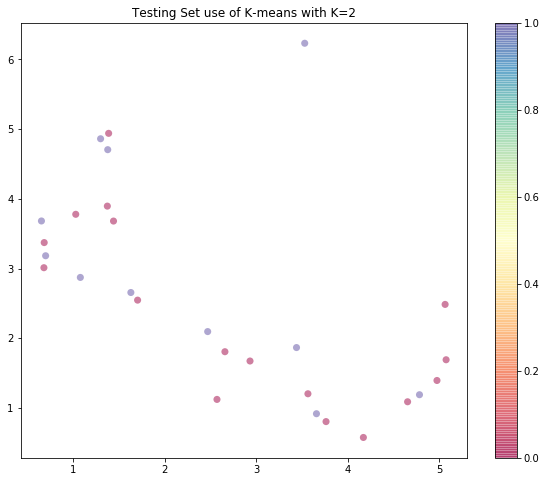

In [34]:
fig = plt.figure(figsize=[10,8])
axes = fig.add_subplot(1, 1, 1)#, axisbg='black')
plt.scatter(Y1[:, 0], Y1[:, 1], c=y_test, cmap=plt.cm.Spectral,edgecolors='none',s=50,alpha=0.5);
plt.title('Testing Set use of K-means with K=2')
cbar=plt.colorbar()
#cbar.set_ticks(list(class_mapping.values()))
#cbar.set_ticklabels(list(class_mapping.keys()))

### Random Forests

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estimators_list = [5,10,50,100,200,300,400,1000]

rfc = RandomForestClassifier(random_state=47)
grid = GridSearchCV(estimator=rfc, param_grid=dict(n_estimators=n_estimators_list))
grid.fit(X_train_std, y_train)

print grid
# summarize the results of the grid search
print 'Grid Training Set Best Score: ',grid.best_score_
print 'Grid Training Set Best Number of Trees Estimator: ', grid.best_estimator_.n_estimators

C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:651: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Grid Training Set Best Score:  0.78125
Grid Training Set Best Number of Trees Estimator:  50


C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estimators_list = [5,10,50,100,200,300,400,1000]

rfc = RandomForestClassifier(random_state=47)
grid = GridSearchCV(estimator=rfc, param_grid=dict(n_estimators=n_estimators_list))
grid.fit(X_test_std, y_test)

print grid
# summarize the results of the grid search
print 'Grid Testing Set Best Score: ',grid.best_score_
print 'Grid Testing Set Best Number of Trees Estimator: ', grid.best_estimator_.n_estimators

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Grid Testing Set Best Score:  0.39285714285714285
Grid Testing Set Best Number of Trees Estimator:  5


C:\Users\m\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
